# The best Models for the cardiovascular disease dataset are:

### Gradient Boosting(XG Boost)

In [5]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('/Users/tadisinahasini/Downloads/cardio_train.csv',delimiter=';')

# Step 2: Data Preprocessing
# Handling missing values (if any)
data.fillna(method='ffill', inplace=True)

# Separating features and target variable
X = data.drop('cardio', axis=1)  # Features
y = data['cardio']  # Target variable

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Assuming data is preprocessed and available as X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Training the model
xgb_classifier.fit(X_train, y_train)

# Making predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred))

/var/folders/h4/1q915gtd17x3_f6dd0gqm51c0000gn/T/ipykernel_25229/209183386.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Accuracy: 73.80%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



### Neural Networks


/var/folders/h4/1q915gtd17x3_f6dd0gqm51c0000gn/T/ipykernel_25229/2771073681.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Epoch 1/20
1400/1400 [==============================] - 1s 720us/step - loss: 0.6312 - accuracy: 0.6525 - val_loss: 0.5842 - val_accuracy: 0.7014
Epoch 2/20
1400/1400 [==============================] - 1s 666us/step - loss: 0.5883 - accuracy: 0.7058 - val_loss: 0.5574 - val_accuracy: 0.7298
Epoch 3/20
1400/1400 [==============================] - 1s 663us/step - loss: 0.5703 - accuracy: 0.7215 - val_loss: 0.5543 - val_accuracy: 0.7307
Epoch 4/20
1400/1400 [==============================] - 1s 663us/step - loss: 0.5605 - accuracy: 0.7238 - val_loss: 0.5474 - val_accuracy: 0.7334
Epoch 5/20
1400/1400 [==============================] - 1s 677us/step - loss: 0.5563 - accuracy: 0.7272 - val_loss: 0.5489 - val_accuracy: 0.7322
Epoch 6/20
1400/1400 [==============================] - 1s 663us/step - loss: 0.5547 - accuracy: 0.7253 - val_loss: 0.5482 - val_accuracy: 0.7346
Epoch 7/20
1400/1400 [==============================] - 1s 662us/step - loss: 0.5529 - accuracy: 0.7276 - val_loss: 0.5457 -

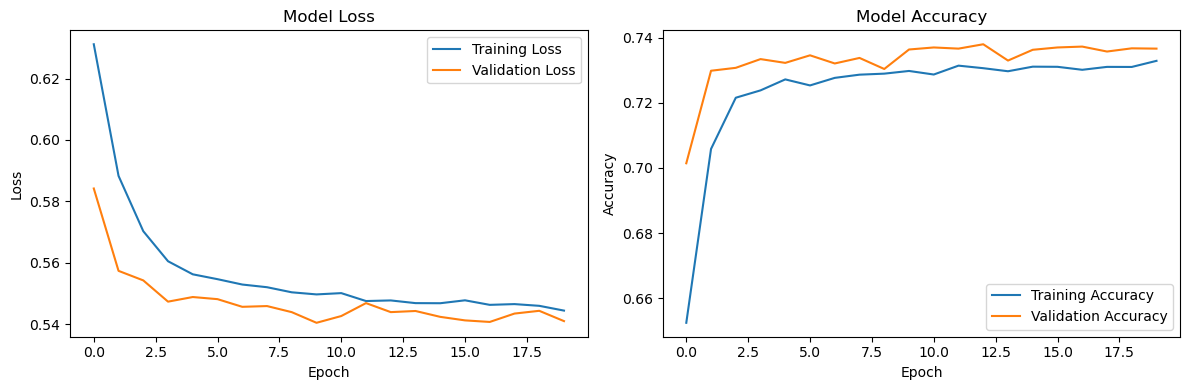

In [3]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the data
data = pd.read_csv('/Users/tadisinahasini/Downloads/cardio_train.csv',delimiter=';')

# Step 2: Data Preprocessing
# Handling missing values (if any)
data.fillna(method='ffill', inplace=True)

# Separating features and target variable
X = data.drop('cardio', axis=1)  # Features
y = data['cardio']  # Target variable
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

print("Neural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Stacking Classifier (using Guassian Naive Bayes, Gradient Boosting(XG Boost), Logistic regression, and Neural Networ as base models, and Logistic Regression as the meta-classifier)

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess data
data = pd.read_csv('/Users/tadisinahasini/Downloads/cardio_train.csv',delimiter=';')
data.fillna(method='ffill', inplace=True)
X = data.drop('cardio', axis=1)
y = data['cardio']


# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)
# Initialize base models
nb = GaussianNB()
lr = LogisticRegression(random_state=42)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)


# Create a function for stacking
def get_stacking(models, meta_model, X_train, y_train, X_test, y_test, n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    # Train base models
    S_train = np.zeros((X_train.shape[0], len(models)))
    S_test = np.zeros((X_test.shape[0], len(models)))
    
    for i, model in enumerate(models):
        S_test_i = np.zeros((X_test.shape[0], n_folds))
        for fold, (train_idx, valid_idx) in enumerate(kf.split(X_train)):
            X_fold_train, y_fold_train = X_train[train_idx], y_train.iloc[train_idx]
            X_fold_valid, y_fold_valid = X_train[valid_idx], y_train.iloc[valid_idx]
            
            model.fit(X_fold_train, y_fold_train)
            S_train[valid_idx, i] = model.predict(X_fold_valid)
            S_test_i[:, fold] = model.predict(X_test)
        
        S_test[:, i] = S_test_i.mean(axis=1)
    
    # Hyperparameter tuning for meta-model
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(estimator=meta_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(S_train, y_train)
    
    print(f'Best Parameters: {grid_search.best_params_}')
    best_meta_model = grid_search.best_estimator_
    
    # Train and predict with the best meta-model
    best_meta_model.fit(S_train, y_train)
    y_pred = best_meta_model.predict(S_test)
    
    return y_pred

# List of base models
models = [nb, lr, xgb]

# Meta-model
meta_model = RandomForestClassifier(random_state=42)

# Get stacking predictions
y_pred = get_stacking(models, meta_model, X_train, y_train, X_test, y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred))

/var/folders/h4/1q915gtd17x3_f6dd0gqm51c0000gn/T/ipykernel_25229/2423231388.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 73.73%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     17430
           1       0.76      0.70      0.73     17570

    accuracy                           0.74     35000
   macro avg       0.74      0.74      0.74     35000
weighted avg       0.74      0.74      0.74     35000

